In [1]:
import os
import shutil
import numpy as np
import pandas as pd
from pathlib import Path

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

# Data

In [2]:
output_dir = '/srv/wu-lab/flash12/hjiang357/ecephys_cache_dir' # 设置为用户有写入权限的目录
DOWNLOAD_COMPLETE_DATASET = True

In [3]:
manifest_path = os.path.join(output_dir, "manifest.json")

In [4]:
cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

In [5]:
sessions = cache.get_session_table()

print('Total number of sessions: ' + str(len(sessions)))

sessions.head()

Total number of sessions: 58


,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
715093703,2019-10-03T00:00:00Z,699733581,brain_observatory_1.1,118.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,884,2219,6,"[CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ..."
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
721123822,2019-10-03T00:00:00Z,707296982,brain_observatory_1.1,125.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,444,2229,6,"[MB, SCig, PPT, NOT, DG, CA1, VISam, nan, LP, ..."
732592105,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt,824,1847,5,"[grey, VISpm, nan, VISp, VISl, VISal, VISrl]"
737581020,2019-10-03T00:00:00Z,718643567,brain_observatory_1.1,108.0,M,wt/wt,568,2218,6,"[grey, VISmma, nan, VISpm, VISp, VISl, VISrl]"


## VISal

In [6]:
filtered_sessions_al = sessions[(sessions.sex == 'M') & \
                             (sessions.full_genotype.str.find('Sst') > -1) & \
                             (sessions.session_type == 'brain_observatory_1.1') & \
                             (['VISal' in acronyms for acronyms in 
                               sessions.ecephys_structure_acronyms])]

filtered_sessions_al

,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
756029989,2019-10-03T00:00:00Z,734865738,brain_observatory_1.1,96.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,684,2214,6,"[TH, DG, CA3, CA1, VISl, nan, PO, Eth, LP, VIS..."
758798717,2019-10-03T00:00:00Z,735109609,brain_observatory_1.1,102.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,593,1486,4,"[MGv, MGd, TH, DG, CA1, VISal, nan, SGN, LP, S..."


## VISpm

In [7]:
filtered_sessions_pm = sessions[(sessions.sex == 'M') & \
                             (sessions.full_genotype.str.find('Sst') > -1) & \
                             (sessions.session_type == 'brain_observatory_1.1') & \
                             (['VISpm' in acronyms for acronyms in 
                               sessions.ecephys_structure_acronyms])]
filtered_sessions_pm

,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
715093703,2019-10-03T00:00:00Z,699733581,brain_observatory_1.1,118.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,884,2219,6,"[CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ..."
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
756029989,2019-10-03T00:00:00Z,734865738,brain_observatory_1.1,96.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,684,2214,6,"[TH, DG, CA3, CA1, VISl, nan, PO, Eth, LP, VIS..."
758798717,2019-10-03T00:00:00Z,735109609,brain_observatory_1.1,102.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,593,1486,4,"[MGv, MGd, TH, DG, CA1, VISal, nan, SGN, LP, S..."


In [8]:
filtered_sessions_al.index[0]

719161530

## One session with VISal and VISpm

In [9]:

session_al_pm = cache.get_session_data(719161530,
                                 isi_violations_maximum = np.inf,
                                 amplitude_cutoff_maximum = np.inf,
                                 presence_ratio_minimum = -np.inf
                                )

print([attr_or_method for attr_or_method in dir(session_al_pm) if attr_or_method[0] != '_'])

/srv/wu-lab/flash12/hjiang357/miniconda3/envs/allensdk/lib/python3.8/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/srv/wu-lab/flash12/hjiang357/miniconda3/envs/allensdk/lib/python3.8/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


['DETAILED_STIMULUS_PARAMETERS', 'LazyProperty', 'age_in_days', 'api', 'channel_structure_intervals', 'channels', 'conditionwise_spike_statistics', 'ecephys_session_id', 'from_nwb_path', 'full_genotype', 'get_current_source_density', 'get_inter_presentation_intervals_for_stimulus', 'get_invalid_times', 'get_lfp', 'get_parameter_values_for_stimulus', 'get_pupil_data', 'get_screen_gaze_data', 'get_stimulus_epochs', 'get_stimulus_parameter_values', 'get_stimulus_table', 'inter_presentation_intervals', 'invalid_times', 'mean_waveforms', 'metadata', 'num_channels', 'num_probes', 'num_stimulus_presentations', 'num_units', 'optogenetic_stimulation_epochs', 'presentationwise_spike_counts', 'presentationwise_spike_times', 'probes', 'rig_equipment_name', 'rig_geometry_data', 'running_speed', 'session_start_time', 'session_type', 'sex', 'specimen_name', 'spike_amplitudes', 'spike_times', 'stimulus_conditions', 'stimulus_names', 'stimulus_presentations', 'structure_acronyms', 'structurewise_unit_c

# Extract neural responses and stimulus presentations

## stimulus - drifting_gratings

In [10]:
dg_stimulus_presentations = session_al_pm.stimulus_presentations.query("stimulus_name == 'drifting_gratings'")
dg_stimulus_presentation_ids = dg_stimulus_presentations.index.tolist()
print(dg_stimulus_presentation_ids)
print(len(dg_stimulus_presentation_ids)) 

[3798, 3799, 3800, 3801, 3802, 3803, 3804, 3805, 3806, 3807, 3808, 3809, 3810, 3811, 3812, 3813, 3814, 3815, 3816, 3817, 3818, 3819, 3820, 3821, 3822, 3823, 3824, 3825, 3826, 3827, 3828, 3829, 3830, 3831, 3832, 3833, 3834, 3835, 3836, 3837, 3838, 3839, 3840, 3841, 3842, 3843, 3844, 3845, 3846, 3847, 3848, 3849, 3850, 3851, 3852, 3853, 3854, 3855, 3856, 3857, 3858, 3859, 3860, 3861, 3862, 3863, 3864, 3865, 3866, 3867, 3868, 3869, 3870, 3871, 3872, 3873, 3874, 3875, 3876, 3877, 3878, 3879, 3880, 3881, 3882, 3883, 3884, 3885, 3886, 3887, 3888, 3889, 3890, 3891, 3892, 3893, 3894, 3895, 3896, 3897, 3898, 3899, 3900, 3901, 3902, 3903, 3904, 3905, 3906, 3907, 3908, 3909, 3910, 3911, 3912, 3913, 3914, 3915, 3916, 3917, 3918, 3919, 3920, 3921, 3922, 3923, 3924, 3925, 3926, 3927, 3928, 3929, 3930, 3931, 3932, 3933, 3934, 3935, 3936, 3937, 3938, 3939, 3940, 3941, 3942, 3943, 3944, 3945, 3946, 3947, 3948, 3949, 3950, 3951, 3952, 3953, 3954, 3955, 3956, 3957, 3958, 3959, 3960, 3961, 3962, 3963, 396

In [11]:
unit_ids = session_al_pm.units.index.tolist()

vispm_units = session_al_pm.units[session_al_pm.units.ecephys_structure_acronym == 'VISpm']
vimal_units = session_al_pm.units[session_al_pm.units.ecephys_structure_acronym == 'VISal']
vispm_unit_ids = vispm_units.index.tolist()
vimal_unit_ids = vimal_units.index.tolist()
vis_al_pm_ids = vispm_unit_ids + vimal_unit_ids
print(vis_al_pm_ids)
print('length of vis_al_pm_ids: ', len(vis_al_pm_ids))

[950927328, 950927365, 950927352, 950927541, 950927482, 950927469, 950929627, 950927569, 950927555, 950927607, 950927637, 950927650, 950927665, 950927726, 950927681, 950929657, 950927780, 950927764, 950927830, 950927860, 950927845, 950927918, 950927794, 950927974, 950927933, 950927961, 950927948, 950927874, 950928079, 950928063, 950928047, 950928109, 950928180, 950928165, 950928141, 950928123, 950928239, 950928223, 950928270, 950928360, 950928344, 950928430, 950928459, 950928475, 950929694, 950928508, 950928491, 950928555, 950928599, 950928582, 950953191, 950953290, 950953350, 950953337, 950953325, 950953390, 950953381, 950953371, 950953464, 950953516, 950953540, 950953582, 950953690, 950953678, 950953711, 950953700, 950953846, 950953757, 950953745, 950953833, 950953822, 950953811, 950953786, 950953893, 950953883, 950953873, 950953945, 950953918, 950954946, 950953965]
length of vis_al_pm_ids:  80


In [12]:
import numpy as np

bin_edges = np.arange(0, session_al_pm.stimulus_presentations['stop_time'].max(), 1)
print(bin_edges)

[0.000e+00 1.000e+00 2.000e+00 ... 9.149e+03 9.150e+03 9.151e+03]


In [22]:
# 获取每个刺激的开始和结束时间
start_times = presentations_filtered['start_time'].values
stop_times = presentations_filtered['stop_time'].values

# 计算每个刺激的持续时间
stimulus_durations = stop_times - start_times

# 设置时间分辨率（例如，0.001秒）
time_resolution = 0.001

# 提取每个刺激对应的神经响应
dg_spike_counts = []
for i, (start, stop) in enumerate(zip(start_times, stop_times)):
    # 创建时间窗口
    time_window = np.arange(start, stop, time_resolution)
    
    # 提取神经响应
    # 希望把spike_counts的shape从(1, 2001, 80)变成(2001, 80)
    spike_counts = session_al_pm.presentationwise_spike_counts(
        bin_edges=time_window,
        stimulus_presentation_ids=[dg_stimulus_presentation_ids[i]],
        unit_ids=vis_al_pm_ids
    )
    spike_counts = np.squeeze(spike_counts)
    dg_spike_counts.append(spike_counts)

dg_spike_counts = np.array(dg_spike_counts)

print("数据形状: (刺激数量, 时间点数量, 神经元数量):", dg_spike_counts.shape)
print(f"每个刺激的平均持续时间: {np.mean(stimulus_durations):.3f} 秒")
print(f"时间分辨率: {time_resolution} 秒")

# 检查第一个刺激的神经响应
print("\n第一个刺激的信息:")
print(f"开始时间: {start_times[0]:.3f} 秒")
print(f"结束时间: {stop_times[0]:.3f} 秒")
print(f"持续时间: {stimulus_durations[0]:.3f} 秒")
print(f"神经响应形状: {dg_spike_counts[0].shape}")

数据形状: (刺激数量, 时间点数量, 神经元数量): (598, 2001, 80)
每个刺激的平均持续时间: 2.002 秒
时间分辨率: 0.001 秒

第一个刺激的信息:
开始时间: 1591.134 秒
结束时间: 1593.136 秒
持续时间: 2.002 秒
神经响应形状: (2001, 80)


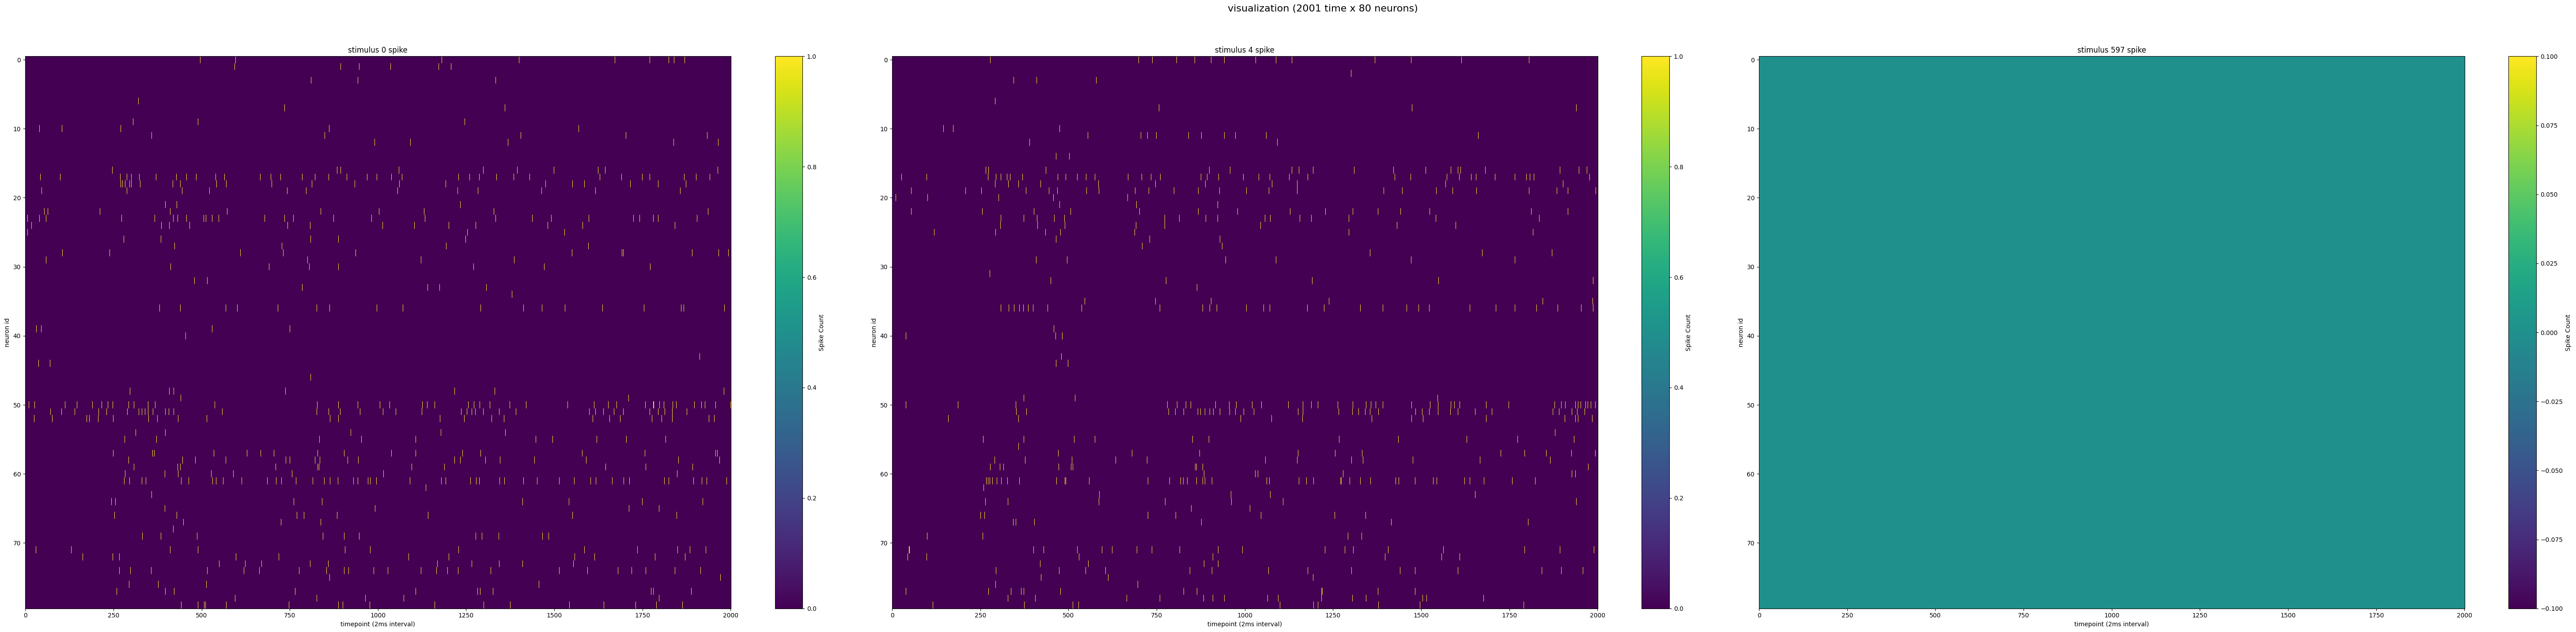

In [23]:
# 对每个刺激的两秒钟数据进行可视化，展示80个神经元在2001个时间点的spike count
import matplotlib.pyplot as plt
import numpy as np

# 选择要展示的刺激索引
stimulus_indices = [0, 4, 597]

# 创建一个3x1的子图布局
fig, axes = plt.subplots(1, 3, figsize=(60, 15))
fig.suptitle('visualization (2001 time x 80 neurons)', fontsize=16)

for idx, stimulus_idx in enumerate(stimulus_indices):
    # 获取当前刺激的神经响应数据
    neural_response = dg_spike_counts[stimulus_idx]
    
    # 创建热图
    im = axes[idx].imshow(neural_response.T, aspect='auto', cmap='viridis', interpolation='nearest')
    
    # 设置标题和标签
    axes[idx].set_title(f'stimulus {stimulus_idx} spike')
    axes[idx].set_xlabel('timepoint (2ms interval)')
    axes[idx].set_ylabel('neuron id')
    
    # 添加颜色条
    plt.colorbar(im, ax=axes[idx], label='Spike Count')

# 调整子图之间的间距
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# 显示图形
plt.show()


In [24]:
session_al_pm.structurewise_unit_counts

CA1      326
APN      322
SUB      118
LGd      118
VISp     112
POL       97
VISam     85
VISl      83
grey      73
CA3       73
LP        59
VISpm     50
VPM       48
DG        47
VISrl     36
VL        34
VISal     30
NOT       28
TH        23
PO        17
CA2        3
Eth        3
Name: ecephys_structure_acronym, dtype: int64

In [15]:
presentations = session_al_pm.get_stimulus_table("drifting_gratings")

time_step = 0.01
time_bins = np.arange(-0.1, 0.5 + time_step, time_step)

units = session_al_pm.units[
    (session_al_pm.units["ecephys_structure_acronym"] == 'VISpm') | 
    (session_al_pm.units["ecephys_structure_acronym"] == 'VISal')
]

histograms = session_al_pm.presentationwise_spike_counts(
    stimulus_presentation_ids=presentations.index.values,  
    bin_edges=time_bins,
    unit_ids=units.index.values
)

print("Histograms shape:", histograms.shape)
print("Units from VISp and VISal:", len(units))

histograms.coords


Histograms shape: (628, 60, 80)
Units from VISp and VISal: 80


Coordinates:
  * stimulus_presentation_id         (stimulus_presentation_id) int64 3798 .....
  * time_relative_to_stimulus_onset  (time_relative_to_stimulus_onset) float64 ...
  * unit_id                          (unit_id) int64 950927328 ... 950953965

In [17]:
presentations.head()

,stimulus_block,start_time,stop_time,contrast,size,temporal_frequency,spatial_frequency,phase,orientation,stimulus_name,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,
3798,2.0,1591.133857,1593.135537,0.8,"[250.0, 250.0]",2.0,0.04,"[42423.86666667, 42423.86666667]",315.0,drifting_gratings,2.00168,246.0
3799,2.0,1594.136403,1596.138053,0.8,"[250.0, 250.0]",4.0,0.04,"[42423.86666667, 42423.86666667]",135.0,drifting_gratings,2.00165,247.0
3800,2.0,1597.138897,1599.140577,0.8,"[250.0, 250.0]",15.0,0.04,"[42423.86666667, 42423.86666667]",225.0,drifting_gratings,2.00168,248.0
3801,2.0,1600.141393,1602.143063,0.8,"[250.0, 250.0]",4.0,0.04,"[42423.86666667, 42423.86666667]",270.0,drifting_gratings,2.00167,249.0
3802,2.0,1603.143897,1605.145547,0.8,"[250.0, 250.0]",4.0,0.04,"[42423.86666667, 42423.86666667]",90.0,drifting_gratings,2.00165,250.0


In [18]:
orientation_values = dg_stimulus_presentations['orientation'].values
temporal_frequency_values = dg_stimulus_presentations['temporal_frequency'].values

In [19]:
# prepare data for VAE
# 1. 提取orientation和temporal frequency做为训练损失的标签
orientation_series = pd.Series(orientation_values)

In [20]:
import pandas as pd
import numpy as np

orientation_series = pd.Series(orientation_values)
temporal_frequency_series = pd.Series(temporal_frequency_values)

orientation_filtered = orientation_series[orientation_series != 'null'].values
temporal_frequency_filtered = temporal_frequency_series[temporal_frequency_series != 'null'].values

orientation_filtered = pd.to_numeric(orientation_filtered, errors='coerce')
temporal_frequency_filtered = pd.to_numeric(temporal_frequency_filtered, errors='coerce')

print('len orientation_filtered: ',len(orientation_filtered))
print('len temporal_frequency_filtered: ', len(temporal_frequency_filtered))

orientation_filtered = np.array(orientation_filtered)
temporal_frequency_filtered = np.array(temporal_frequency_filtered)

deleted_stimulus_ids = np.where(orientation_values == 'null')

actual_indices = presentations.index.tolist()

indices_to_delete = [actual_indices[i] for i in deleted_stimulus_ids[0] if i < len(actual_indices)]

presentations_filtered = presentations.drop(indices_to_delete)

print(f"presentations rows: {len(presentations)}")
print(f"presentations_filtered rows: {len(presentations_filtered)}")
print(f"orientation_filtered: {orientation_filtered.shape}")



len orientation_filtered:  598
len temporal_frequency_filtered:  598
presentations rows: 628
presentations_filtered rows: 598
orientation_filtered: (598,)


In [21]:
presentations_filtered.head()

,stimulus_block,start_time,stop_time,contrast,size,temporal_frequency,spatial_frequency,phase,orientation,stimulus_name,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,
3798,2.0,1591.133857,1593.135537,0.8,"[250.0, 250.0]",2.0,0.04,"[42423.86666667, 42423.86666667]",315.0,drifting_gratings,2.00168,246.0
3799,2.0,1594.136403,1596.138053,0.8,"[250.0, 250.0]",4.0,0.04,"[42423.86666667, 42423.86666667]",135.0,drifting_gratings,2.00165,247.0
3800,2.0,1597.138897,1599.140577,0.8,"[250.0, 250.0]",15.0,0.04,"[42423.86666667, 42423.86666667]",225.0,drifting_gratings,2.00168,248.0
3801,2.0,1600.141393,1602.143063,0.8,"[250.0, 250.0]",4.0,0.04,"[42423.86666667, 42423.86666667]",270.0,drifting_gratings,2.00167,249.0
3802,2.0,1603.143897,1605.145547,0.8,"[250.0, 250.0]",4.0,0.04,"[42423.86666667, 42423.86666667]",90.0,drifting_gratings,2.00165,250.0


# VAE

In [25]:
import torch
import numpy as np
import random

# 设置随机种子
seed = 42  # 你可以选择任何数值作为随机种子
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

# 如果使用了GPU，也要设置GPU的随机种子
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)  # 如果有多个GPU
    torch.backends.cudnn.deterministic = True  # 确保每次卷积操作结果相同
    torch.backends.cudnn.benchmark = False     # 禁用CUDNN的优化，确保可重复性

# 检查是否有可用的 GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 查看可用的 GPU 数量
print(f"Number of GPUs available: {torch.cuda.device_count()}")

Using device: cuda
Number of GPUs available: 8


In [26]:
num_stimulus, time_bins, num_neurons = dg_spike_counts.shape
flattened_data = dg_spike_counts.reshape(num_stimulus, time_bins * num_neurons)

print(flattened_data.shape) 
input_dim = time_bins * num_neurons  
hidden_dim = 256
latent_dim = 2 

(598, 160080)


In [27]:
import torch
import torch.nn as nn
import torch.optim as optim

class VAE(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(VAE, self).__init__()
        
        # Encoder
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2_mean = nn.Linear(hidden_dim, latent_dim)
        self.fc2_logvar = nn.Linear(hidden_dim, latent_dim)
        
        # Decoder
        self.fc3 = nn.Linear(latent_dim, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, input_dim)
        
    def encode(self, x):
        h1 = torch.relu(self.fc1(x))
        z_mean = self.fc2_mean(h1)
        z_logvar = self.fc2_logvar(h1)
        return z_mean, z_logvar
    
    def reparameterize(self, z_mean, z_logvar):
        std = torch.exp(0.5 * z_logvar)
        eps = torch.randn_like(std)
        return z_mean + eps * std
    
    def decode(self, z):
        h3 = torch.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h3))  # 将解码器输出限制在 [0, 1] 范围内
    
    def forward(self, x):
        z_mean, z_logvar = self.encode(x)
        z = self.reparameterize(z_mean, z_logvar)
        return self.decode(z), z_mean, z_logvar

# 移动模型到 GPU
vae = VAE(input_dim, hidden_dim, latent_dim).to(device)

if torch.cuda.device_count() > 1:
    print("Using", torch.cuda.device_count(), "GPUs!")
    vae = nn.DataParallel(vae)

# 定义优化器
optimizer = optim.Adam(vae.parameters(), lr=1e-4)

Using 8 GPUs!


In [28]:
# 对 orientation 和 temporal_freq 归一化处理，确保它们在 [0, 1] 范围内
orientation_true = (orientation_filtered - orientation_filtered.min()) / (orientation_filtered.max() - orientation_filtered.min())
temporal_freq_true = (temporal_frequency_filtered - temporal_frequency_filtered.min()) / (temporal_frequency_filtered.max() - temporal_frequency_filtered.min())

# 将方向和速度目标转换为张量，并移动到 GPU
orientation_true = torch.tensor(orientation_true).float().to(device)
temporal_freq_true = torch.tensor(temporal_freq_true).float().to(device)

# 将展平后的神经信号数据移动到 GPU
flattened_data = torch.tensor(flattened_data).float().to(device)

In [29]:
def vae_loss(z_mean, z_logvar, orientation_true, temporal_freq_true, z_pred):
    
    orientation_pred = z_pred[:, 0]
    temporal_freq_pred = z_pred[:, 1]
    
    orientation_loss = nn.MSELoss()(orientation_pred, orientation_true)
    temporal_freq_loss = nn.MSELoss()(temporal_freq_pred, temporal_freq_true)
    
    return orientation_loss + temporal_freq_loss

In [30]:
epochs = 50
for epoch in range(epochs):
    vae.train()

    recon_x, z_mean, z_logvar = vae(flattened_data)
    
    z_pred = z_mean
    
    loss = vae_loss(z_mean, z_logvar, orientation_true, temporal_freq_true, z_pred)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    print(f'Epoch {epoch + 1}, Loss: {loss.item()}')

Epoch 1, Loss: 0.6257306337356567
Epoch 2, Loss: 0.4164030849933624
Epoch 3, Loss: 0.31159675121307373
Epoch 4, Loss: 0.2805238962173462
Epoch 5, Loss: 0.2646125555038452
Epoch 6, Loss: 0.24024206399917603
Epoch 7, Loss: 0.21357128024101257
Epoch 8, Loss: 0.19564174115657806
Epoch 9, Loss: 0.1895747184753418
Epoch 10, Loss: 0.19135408103466034
Epoch 11, Loss: 0.19554616510868073
Epoch 12, Loss: 0.1987636536359787
Epoch 13, Loss: 0.1997758150100708
Epoch 14, Loss: 0.19862475991249084
Epoch 15, Loss: 0.19608049094676971
Epoch 16, Loss: 0.19315405189990997
Epoch 17, Loss: 0.1906193643808365
Epoch 18, Loss: 0.18877361714839935
Epoch 19, Loss: 0.18745818734169006
Epoch 20, Loss: 0.18629825115203857
Epoch 21, Loss: 0.18499577045440674
Epoch 22, Loss: 0.18351051211357117
Epoch 23, Loss: 0.1820456087589264
Epoch 24, Loss: 0.18088200688362122
Epoch 25, Loss: 0.18020057678222656
Epoch 26, Loss: 0.17997388541698456
Epoch 27, Loss: 0.17999184131622314
Epoch 28, Loss: 0.1799914538860321
Epoch 29, L

In [33]:
if isinstance(vae, nn.DataParallel):
    encoder_weights_mean = vae.module.fc2_mean.weight.detach().cpu().numpy()
    encoder_weights_logvar = vae.module.fc2_logvar.weight.detach().cpu().numpy()
else:
    encoder_weights_mean = vae.fc2_mean.weight.detach().cpu().numpy()
    encoder_weights_logvar = vae.fc2_logvar.weight.detach().cpu().numpy()

/tmp/ipykernel_3030175/3505073798.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


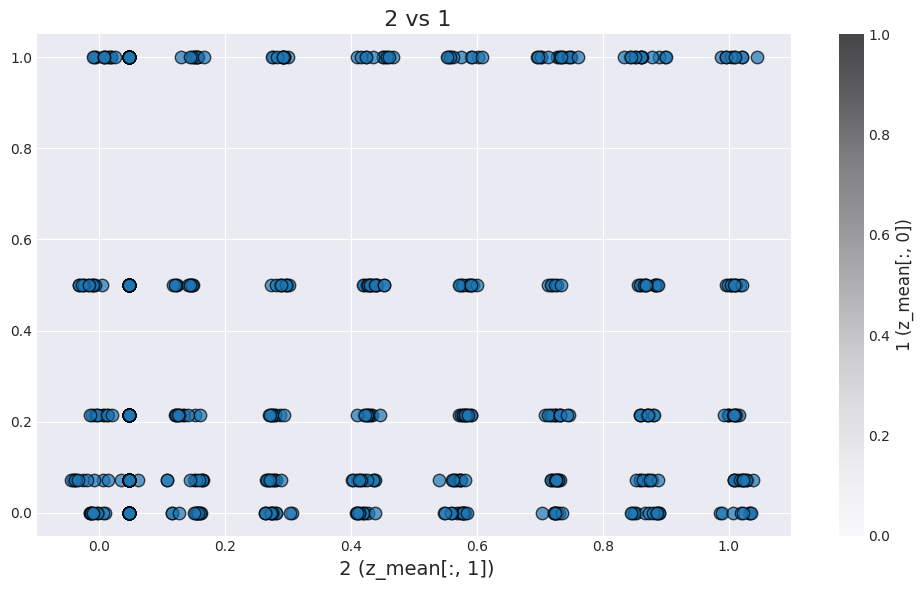

In [39]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')

fig, ax = plt.subplots(figsize=(10, 6))

scatter = ax.scatter(z_mean[:, 0].detach().cpu().numpy(), temporal_freq_true.detach().cpu().numpy(), 
                     cmap='viridis', 
                     s=80, edgecolors='black', alpha=0.7)

ax.set_xlabel(" (z_mean[:, 0])", fontsize=14)
ax.set_ylabel("", fontsize=14)
ax.set_title(" 2 vs latent variable 1", fontsize=16)
ax.grid(True)

cbar = plt.colorbar(scatter)
cbar.set_label("1 (z_mean[:, 0])", fontsize=12)

plt.tight_layout()
plt.show()

# BetaVAE

In [16]:


# 3. VAE 模型设计
class BetaVAE(nn.Module):
    def __init__(self, input_dim, latent_dim, beta=1.0):
        super(BetaVAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, latent_dim * 2)  # 输出均值和对数方差
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim),
            nn.Sigmoid()  # 假设输出在 [0, 1] 之间
        )
        self.beta = beta

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        mu_logvar = self.encoder(x)
        mu, logvar = mu_logvar.chunk(2, dim=-1)
        z = self.reparameterize(mu, logvar)
        return self.decoder(z), mu, logvar

# 4. 训练模型
def train_vae(model, data_loader, num_epochs=50, learning_rate=1e-3):
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    for epoch in range(num_epochs):
        for data in data_loader:
            optimizer.zero_grad()
            recon_batch, mu, logvar = model(data)
            # 计算损失
            BCE = nn.functional.binary_cross_entropy(recon_batch, data, reduction='sum')
            KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
            loss = BCE + model.beta * KLD
            loss.backward()
            optimizer.step()

# 5. 潜在空间分析
def plot_latent_space(model, data_loader):
    with torch.no_grad():
        for data in data_loader:
            mu_logvar = model.encoder(data)
            mu, _ = mu_logvar.chunk(2, dim=-1)
            plt.scatter(mu[:, 0].numpy(), mu[:, 1].numpy())
            plt.xlabel('Latent Dimension 1')
            plt.ylabel('Latent Dimension 2')
            plt.title('Latent Space Representation')
            plt.show()

# 6. 潜在空间操作
def manipulate_latent_space(model, original_data, direction_vector):
    with torch.no_grad():
        mu_logvar = model.encoder(original_data)
        mu, _ = mu_logvar.chunk(2, dim=-1)
        manipulated_mu = mu + direction_vector  # 修改潜在空间
        reconstructed_data = model.decoder(manipulated_mu)
        return reconstructed_data

# 7. 模型评估与优化
def evaluate_model(predictions, true_labels):
    cm = confusion_matrix(true_labels, predictions)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# 8. 运行模型
# 这里需要将神经响应数据转换为适合 VAE 的格式
# 例如：data_loader = DataLoader(neural_response_data, batch_size=32, shuffle=True)
# model = BetaVAE(input_dim=neural_response_data.shape[1], latent_dim=10)
# train_vae(model, data_loader)
# plot_latent_space(model, data_loader)

NameError: name 'nn' is not defined